In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("D:/python/practice/NBA/data/onlyJH_team.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,...,PTS,+/-,CP3,G,Tm,Opp,Away,Win,JH,SP
0,0,0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,...,27.0,1.0,1,1,122,121,1,1,1,2184
1,1,1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,...,27.0,1.0,1,2,105,100,1,1,1,2266
2,2,2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,...,29.0,31.0,0,3,107,91,0,1,1,1845
3,3,3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,...,22.0,-14.0,0,4,90,98,0,0,1,2108
4,4,4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,...,27.0,9.0,0,5,105,104,1,1,1,2486


In [3]:
headers = []
for col in df.columns:
    headers.append(col)
headers[0:2]

['Unnamed: 0', 'Unnamed: 0.1']

In [4]:
df = df.drop(headers[0:2], axis = 1)

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,TRB,AST,...,PTS,+/-,CP3,G,Tm,Opp,Away,Win,JH,SP
0,James Harden,36:24,10.0,23.0,0.435,4.0,9.0,0.444,6.0,11.0,...,27.0,1.0,1,1,122,121,1,1,1,2184
1,James Harden,37:46,8.0,21.0,0.381,4.0,14.0,0.286,3.0,9.0,...,27.0,1.0,1,2,105,100,1,1,1,2266
2,James Harden,30:45,10.0,19.0,0.526,6.0,13.0,0.462,3.0,7.0,...,29.0,31.0,0,3,107,91,0,1,1,1845
3,James Harden,35:08,8.0,20.0,0.400,2.0,8.0,0.250,5.0,8.0,...,22.0,-14.0,0,4,90,98,0,0,1,2108
4,James Harden,41:26,10.0,20.0,0.500,2.0,8.0,0.250,3.0,13.0,...,27.0,9.0,0,5,105,104,1,1,1,2486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,James Harden,35:57,8.0,19.0,0.421,1.0,6.0,0.167,3.0,8.0,...,25.0,-19.0,1,77,83,100,1,0,1,2157
68,James Harden,33:59,12.0,18.0,0.667,5.0,8.0,0.625,10.0,9.0,...,38.0,17.0,1,78,120,104,0,1,1,2039
69,James Harden,34:21,7.0,13.0,0.538,3.0,6.0,0.500,6.0,7.0,...,24.0,7.0,1,79,96,94,0,1,1,2061
70,James Harden,36:25,7.0,16.0,0.438,3.0,8.0,0.375,4.0,9.0,...,26.0,2.0,1,80,102,108,0,0,1,2185


In [6]:
df = df.drop(headers[0:2], axis = 1)

In [14]:
df["JH"].value_counts()

1    72
Name: JH, dtype: int64

In [38]:
features = ['SP', 'Away', 'CP3', '3PA', 'TRB', 'AST', 'STL', 'BLK', 'PTS']
X = df[features]
y = df['Win']

In [39]:
df[features].corr()

,SP,Away,CP3,3PA,TRB,AST,STL,BLK,PTS
SP,1.000000,-0.070282,-0.083028,0.226878,0.198026,0.134802,0.307324,0.210489,0.543649
Away,-0.070282,1.000000,0.015036,-0.079397,-0.111647,-0.004797,-0.096374,-0.183269,-0.029455
CP3,-0.083028,0.015036,1.000000,-0.162177,0.064183,-0.249603,0.007429,0.090387,-0.060484
3PA,0.226878,-0.079397,-0.162177,1.000000,0.148270,0.078281,0.078735,-0.102561,0.242304
TRB,0.198026,-0.111647,0.064183,0.148270,1.000000,0.036393,0.093280,-0.157393,0.021476
AST,0.134802,-0.004797,-0.249603,0.078281,0.036393,1.000000,0.175125,-0.044474,-0.006970
STL,0.307324,-0.096374,0.007429,0.078735,0.093280,0.175125,1.000000,0.022911,0.057251
BLK,0.210489,-0.183269,0.090387,-0.102561,-0.157393,-0.044474,0.022911,1.000000,-0.077431
PTS,0.543649,-0.029455,-0.060484,0.242304,0.021476,-0.006970,0.057251,-0.077431,1.000000


In [7]:
import statsmodels.api as sm

In [83]:
features = ['SP', 'Away', 'CP3', '3PA', 'TRB', 'AST', 'STL', 'BLK', 'PTS']
X = df[features]
y = df['Win']
logit = sm.Logit(y, X).fit()
print(logit.summary())

In [8]:
df["others_pts"] = df["Tm"] - df["PTS"]

In [9]:
#多了others_pts
features = ['SP', 'Away', 'CP3', '3PA', '3P%', 'TRB', 'AST', 'STL', 'BLK', 'PTS', 'others_pts']
X = df[features]
y = df['Win']
logit = sm.Logit(y, X).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.237126
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                   72
Model:                          Logit   Df Residuals:                       61
Method:                           MLE   Df Model:                           10
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.4979
Time:                        11:03:48   Log-Likelihood:                -17.073
converged:                       True   LL-Null:                       -34.001
Covariance Type:            nonrobust   LLR p-value:                 0.0001954
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SP            -0.0104      0.003     -3.003      0.003      -0.017      -0.004
Away          -0.9646      0.

In [ ]:
#球隊仰賴JH的三分，也仰賴其他隊員的發揮

In [49]:
df.groupby('Win')['others_pts'].describe()

,count,mean,std,min,25%,50%,75%,max
Win,,,,,,,,
0,13.0,72.000000,8.897565,58.0,65.0,69.0,78.0,90.0
1,59.0,84.711864,10.946659,54.0,77.5,82.0,93.0,108.0


In [92]:
#Harden以外之隊員得分越高勝率越高

In [117]:
df.groupby('Win')['PTS'].describe().reset_index()

,Win,count,mean,std,min,25%,50%,75%,max
0,0,13.0,31.384615,10.774495,20.0,23.0,29.0,38.0,51.0
1,1,59.0,30.220339,8.866963,10.0,26.0,28.0,34.5,60.0


In [105]:
df.groupby('Win')['PTS'].describe().shape

(2, 8)

<AxesSubplot:title={'center':"Correlation Between James Harden's Points and Game Win"}>

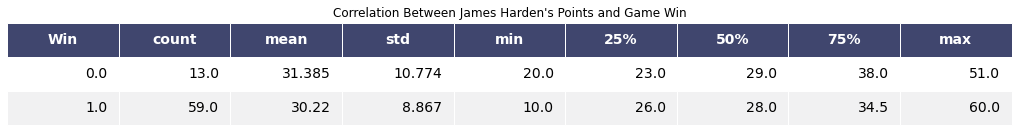

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax.set_title("Correlation Between James Harden's Points and Game Win")

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df.groupby('Win')['PTS'].describe().round(decimals = 3).reset_index(), header_columns=0, col_width=2.0)

<AxesSubplot:title={'center':"Correlation Between Other Teammates' Points and Game Win"}>

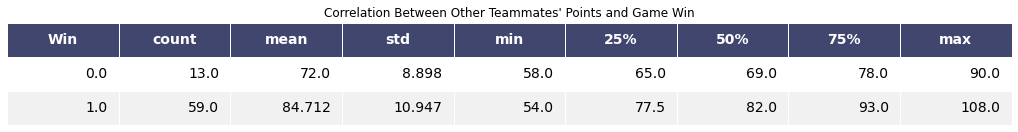

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax.set_title("Correlation Between Other Teammates' Points and Game Win")

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df.groupby('Win')['others_pts'].describe().round(decimals = 3).reset_index(), header_columns=0, col_width=2.0)

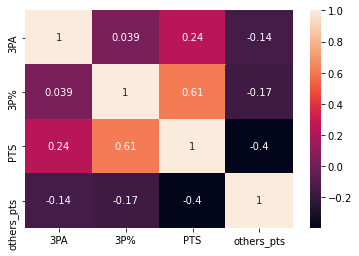

In [11]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df_corr = df[['3PA', '3P%', 'PTS', 'others_pts']].corr().round(decimals = 3)

sn.heatmap(df_corr, annot=True)
plt.show()

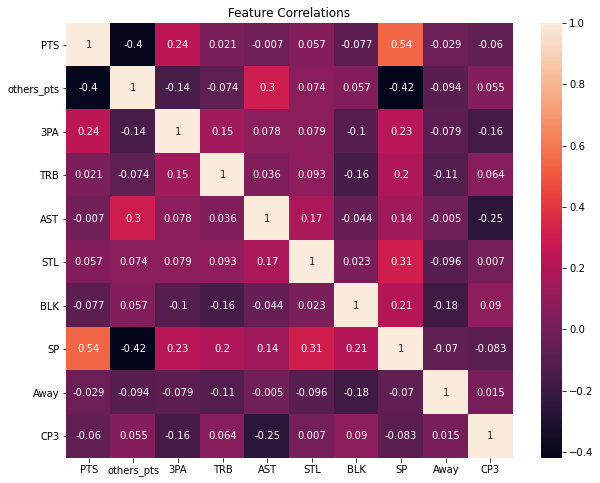

Optimization terminated successfully.
         Current function value: 0.261865
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    Win   No. Observations:                   72
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                  0.4455
Time:                        11:11:52   Log-Likelihood:                -18.854
converged:                       True   LL-Null:                       -34.001
Covariance Type:            nonrobust   LLR p-value:                 0.0003910
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.1040      0.059      1.775      0.076      -0.011       0.219
others_pts     0.1554      0.

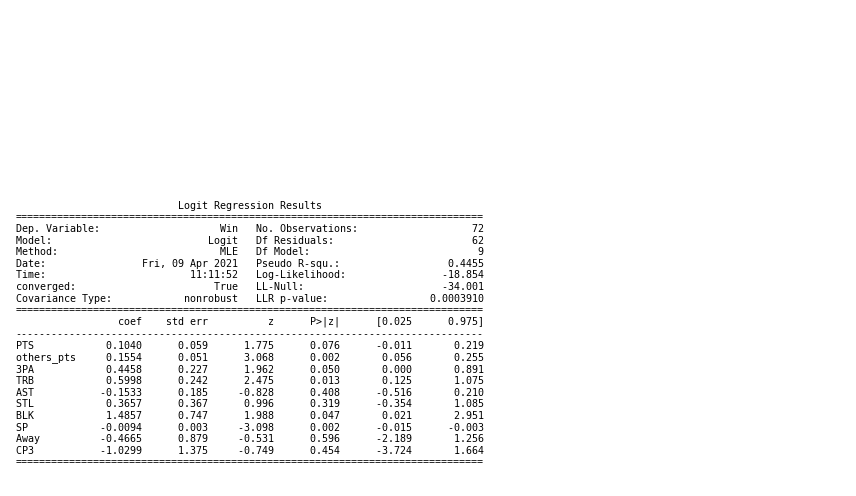

In [13]:
#少了3P%
from matplotlib.pyplot import figure
features = ['PTS', 'others_pts', '3PA', 'TRB', 'AST', 'STL', 'BLK', 'SP', 'Away', 'CP3' ]
X = df[features]
y = df['Win']
df_corr = df[features].corr().round(decimals = 3)
plt.figure(figsize=(10, 8))
sn.heatmap(df_corr, annot=True)
plt.title("Feature Correlations")
plt.show()
logit = sm.Logit(y, X).fit()
print(logit.summary())
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(logit.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
#plt.savefig('output.png')

In [14]:
df.to_csv("D:/python/practice/NBA/data/reg.csv")